# Linear Classification and Logistic Regression on Breast Cancer Dataset

## Objective
This exercise explores the application of logistic and linear regression on the Breast Cancer dataset. The notebook will demonstrate model implementation, evaluation, visualization, and comparison, focusing on the difference in performance when using more complex data.

### Table of Contents
1. Introduction
2. Dataset Overview
3. Data Preprocessing
4. Model Implementation
5. Model Evaluation
6. Hyperparameter Tuning
7. Visualization of Results and Comparison
8. Conclusion and Discussion

### Linear Classification and Logistic Regression on Breast Cancer Dataset
In this notebook, we will explore logistic regression and linear regression on the Breast Cancer dataset. The goal is to compare the performance of both models and analyze their decision boundaries on a more complex dataset.

We will:
- Load and preprocess the Breast Cancer dataset.
- Implement logistic and linear regression models.
- Evaluate and compare their performance using multiple metrics.
- Visualize the decision boundaries.

## Introduction
Breast Cancer is a bla bla bla bla bla bla. Multiple methodologies to diagnose Breast Cancer such as bla bla bla bla bla. 

By using Linear Classification and Logistic Regression, we can train a machine learning model to predict Benign and Malignant tumors based on several key features in the Breast Cancer dataset.

## Dataset Overview
The Breast Cancer dataset will be used for training the Logistic Regression model and the Linear Regression model. In this section, we will explore and analyze the dataset using Exploratory Data Analysis (EDA).

In [364]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import  GridSearchCV

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

### Dataset Information
Shown below are the data types, number of null values, and the summarized statistics of the dataset. The findings are the following:
- All features have no null values
- All features are float dataype
- There are no missing values
- mean radius, mean texture, mean perimeter, and mean area have high standard deviation
- mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, and mean fractal dimension have low standard deviation
- worst perimeter and worst area have high standard deviation
- worst smoothness, worst concave points, worst symmetry, and worst fractal dimension have low standard deviation
- worst radius, worst texture, worst compactness, and worst concavity have standard deviation closer to 1

In [365]:
# Get data types and missing values
print(X.info())

# Summary statistics for numerical features
print(X.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Distribution of Benign and Malignant cases
Shown below is the Count Plot of the target variable. 
- Benign have 212 cases
- Malignant have 357 cases
- Total number of cases are 569 cases

target
1    357
0    212
Name: count, dtype: int64


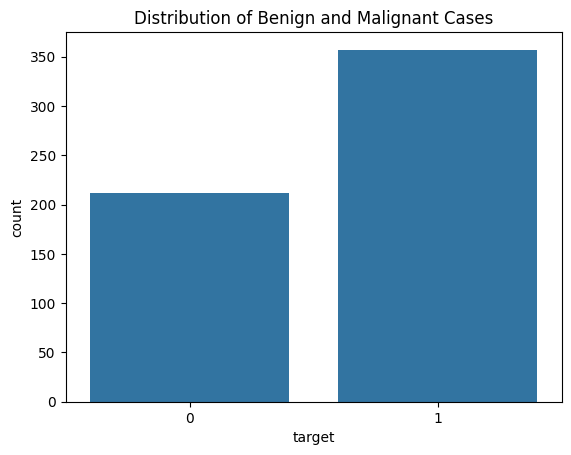

In [366]:
# Distribution of benigh and malignant cases (0 for benign, 1 for malignant)
print(y.value_counts())

y_df = y.to_frame(name='target')
sns.countplot(x='target', data=y_df)
plt.title('Distribution of Benign and Malignant Cases')
plt.show()

### Feature Correlation Matrix
Shown below is the Correlation Matrix of all the features. To further analyze each features, we will separate the mean features, error features, and worst features after the code block below.

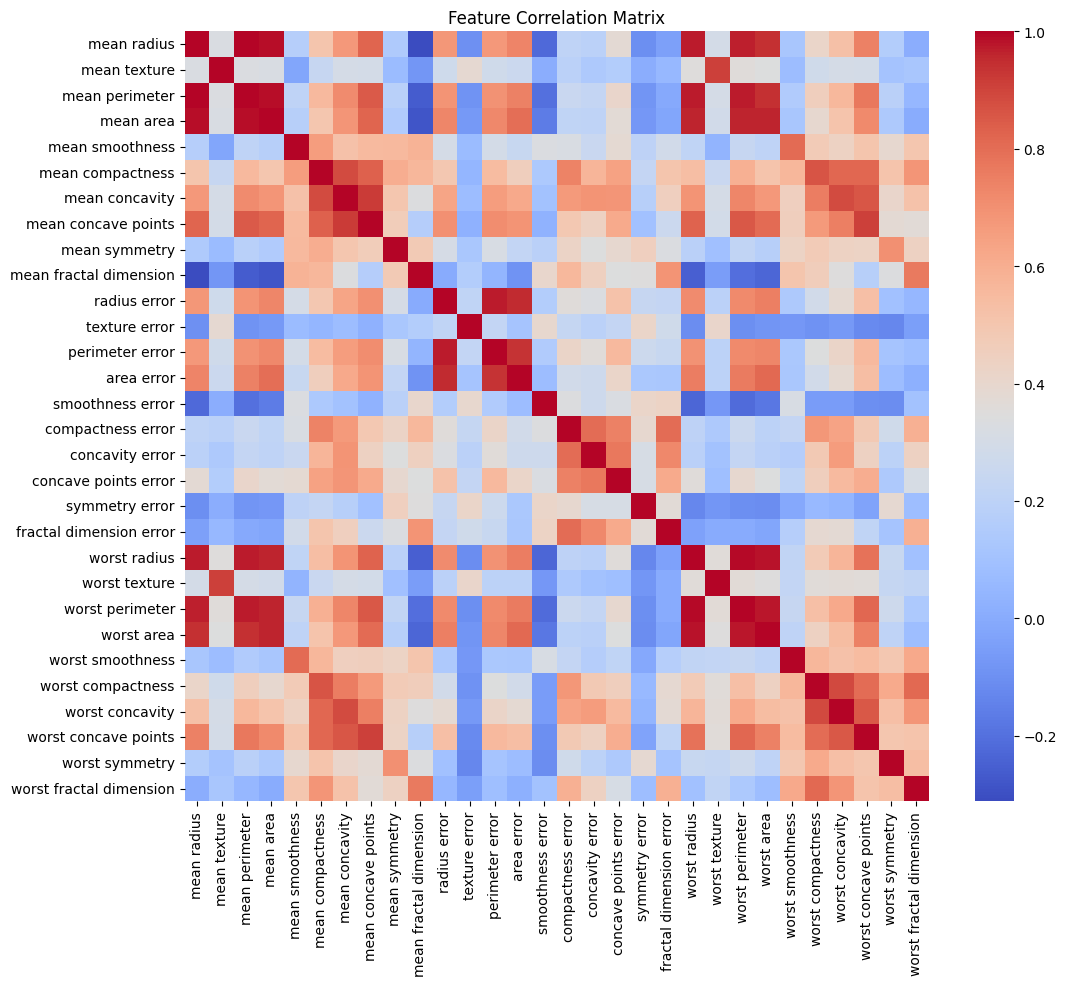

In [367]:
# Show feature correlation
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

### Feature Correlation Matrix of the Mean Features
There are significant relationships between some mean features. The findings are the following:
- Mean Radius, Mean Perimiter, and Mean Area have very strong positive relationship with each other
- Mean Compactness, Mean Concavity, and Mean Symmetry have very strong positive relationship with each other
- Mean Concavity and Mean Concave Points have moderately strong positive relationship with Mean Radius, Mean Perimeter, and Mean Area
- Mean Fractal Dimension have very strong negative relationship with Mean Radius, Mean Perimeter, and Mean Area

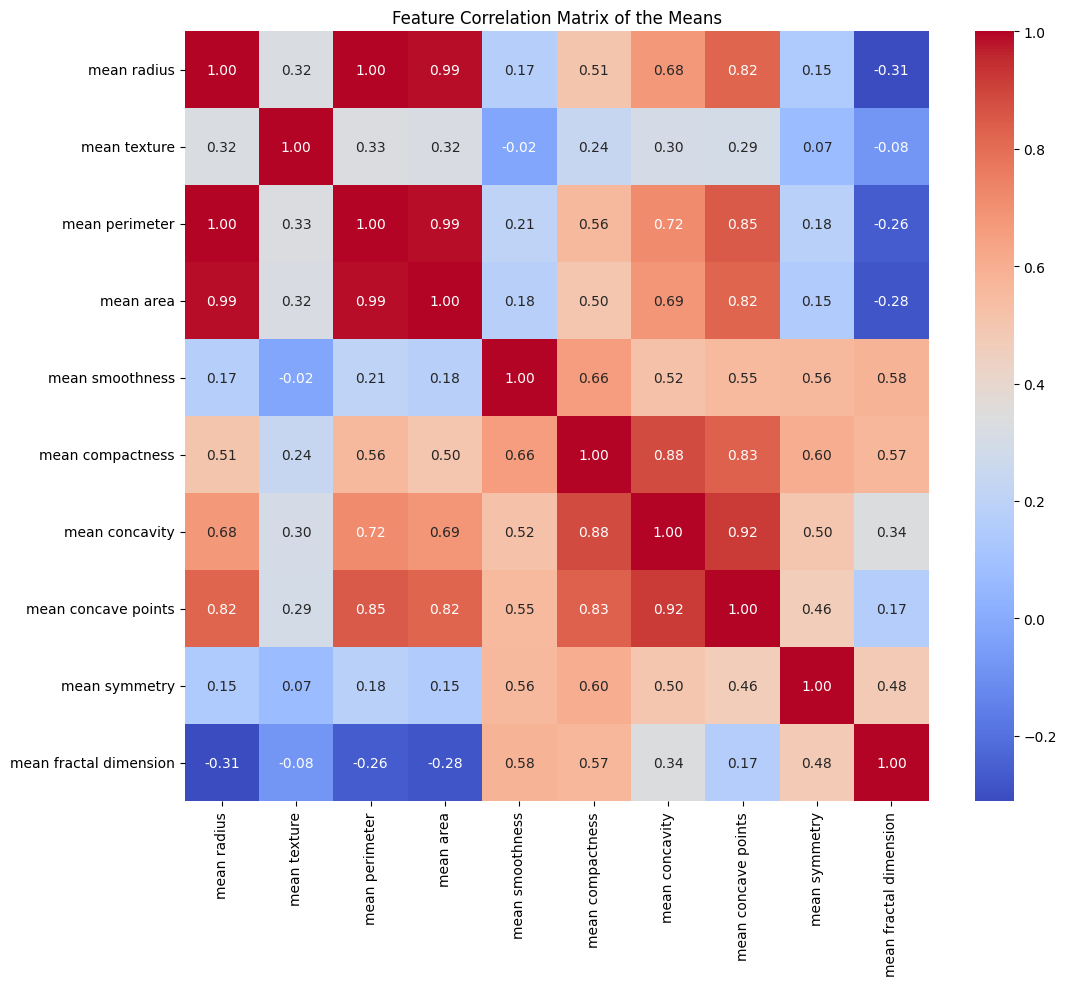

In [368]:
# Show feature correlation of the mean features
featureMeans = list(X.columns[0:10])
plt.figure(figsize=(12, 10))
sns.heatmap(X[featureMeans].corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix of the Means")
plt.show()

### Feature Correlation Matrix of the Error Features
There are significant relationships between some error features. The findings are the following:
- Radius Error, Perimiter Error, and Area Error have very strong positive relationship with each other
- Compactness Error, Concavity Error, and Concave Points Error have strong positive relationship with each other
- Fractal Dimension Error have strong positive relationship with Compactness Error, Concavity Error, and Concave Points Error
- Smoothness Error have very strong negative relationship with Area, Radius, and Perimeter Error 
- Symmetry have very strong negative relationship with Area Error.
- Texture Error have strong negative relationship with Radius, Perimeter, Area, Compactness, Concavity, Concave Points, and Fractal Dimension Error

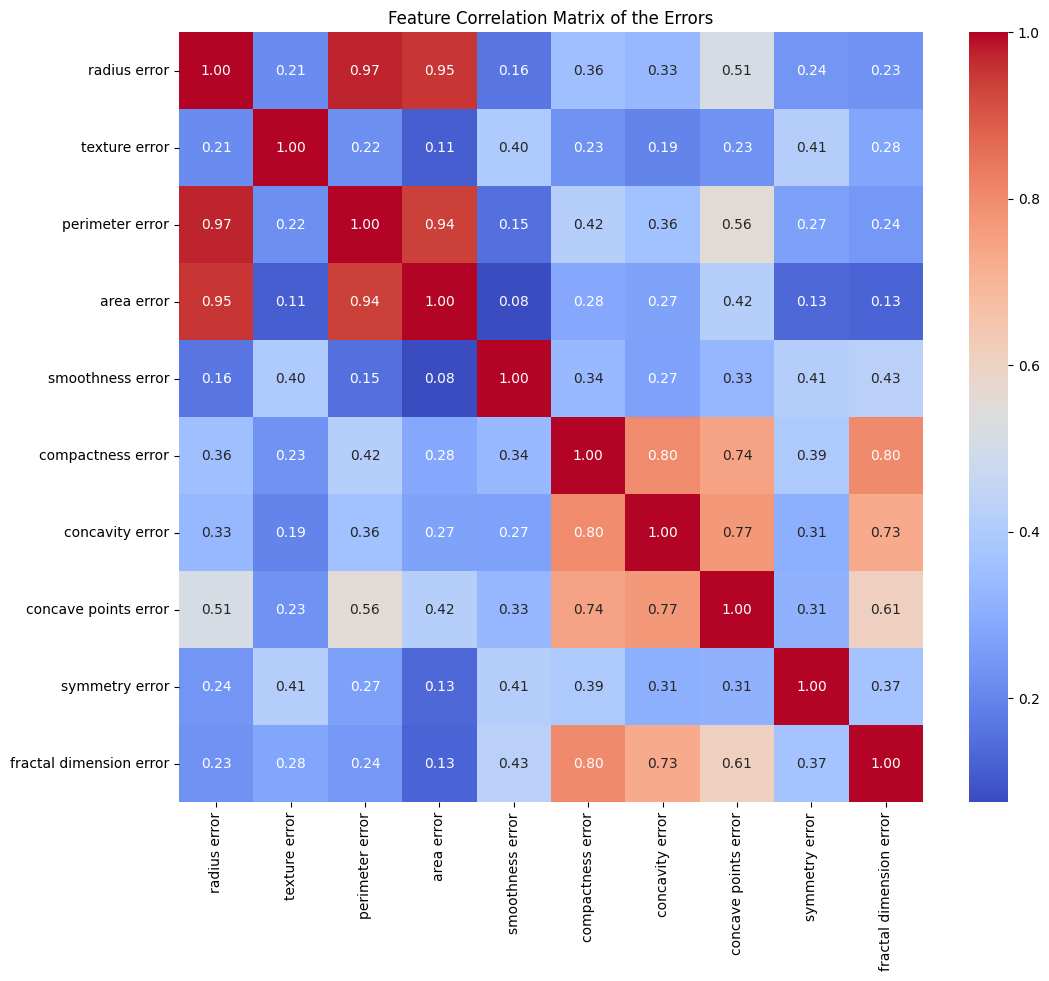

In [369]:
# Show feature correlation of the error features
featureError = list(X.columns[10:20])
plt.figure(figsize=(12, 10))
sns.heatmap(X[featureError].corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix of the Errors")
plt.show()

### Feature Correlation Matrix of the Error Features
There are significant relationships between some error features. The findings are the following:
- Worst Radius, Perimiter, and Area have very strong positive relationship with each other
- Worst Compactness, Concavity, and Concave Points have strong positive relationship with each other
- Worst Fractal Dimension have strong negative relationship with Worst Radius, Perimeter, and Area
- Worst Concave Points have strong positive relationship with Worst Radius, Perimeter, and Area
- Worst Symmetry have moderately strong negative relationship with Worst Area, Perimeter, and Radius
- Worst Texture have moderately strong negative relationship with Worst Symmetry, Smoothness, and Fractal Dimension
- Worst Smoothness have moderately strong negative relationship with Worst Radius, Texture, Perimeter, and Area

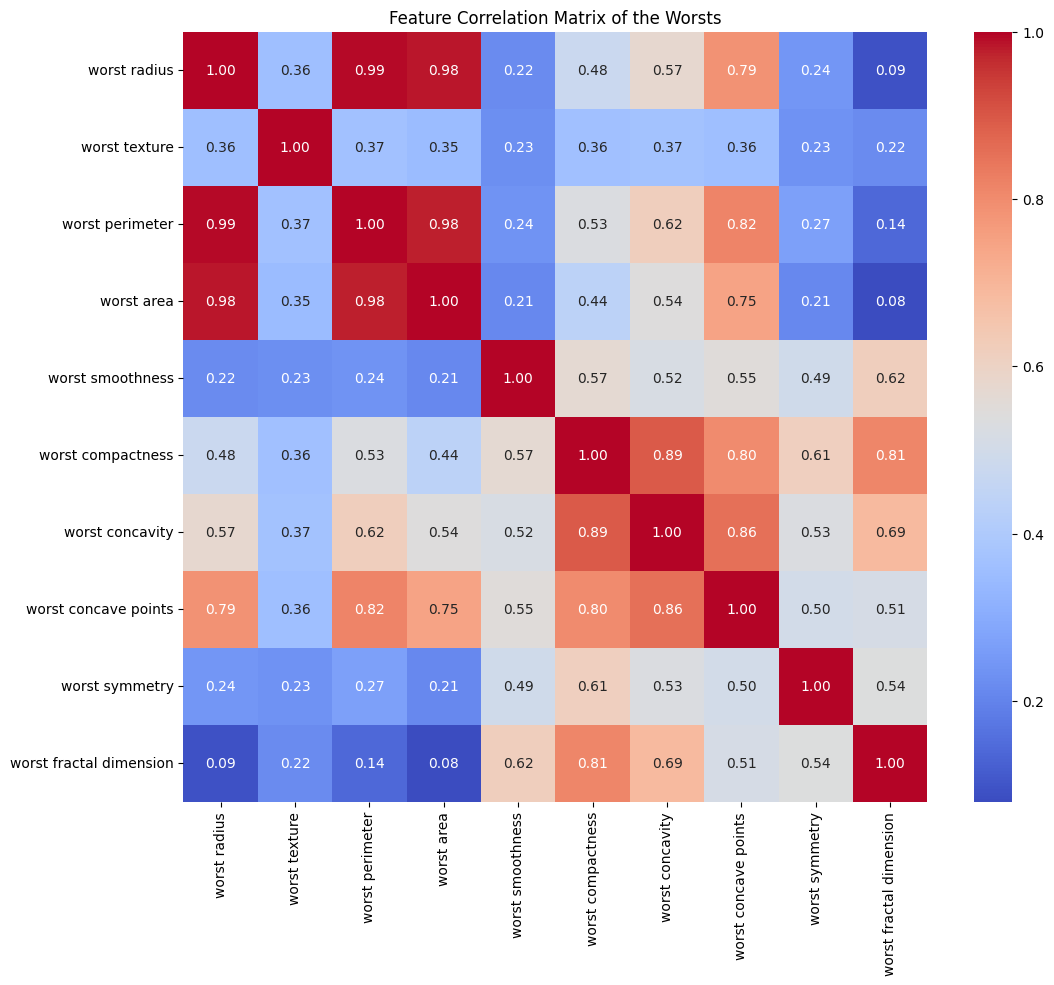

In [370]:
# Show feature correlation of the worst features
featureWorst = list(X.columns[20:30])
plt.figure(figsize=(12, 10))
sns.heatmap(X[featureWorst].corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix of the Worsts")
plt.show()

### Distribution of Mean Features
Figure shown below how datapoints (Benign and Malignant) are distributed in each features. The findings are as follows:
- Mean Radius, Mean Texture, Mean Perimeter, Mean Area, Mean Compactness, Mean Concavity, and Mean Concave Points have datapoints that are fairly not overlapping with each other

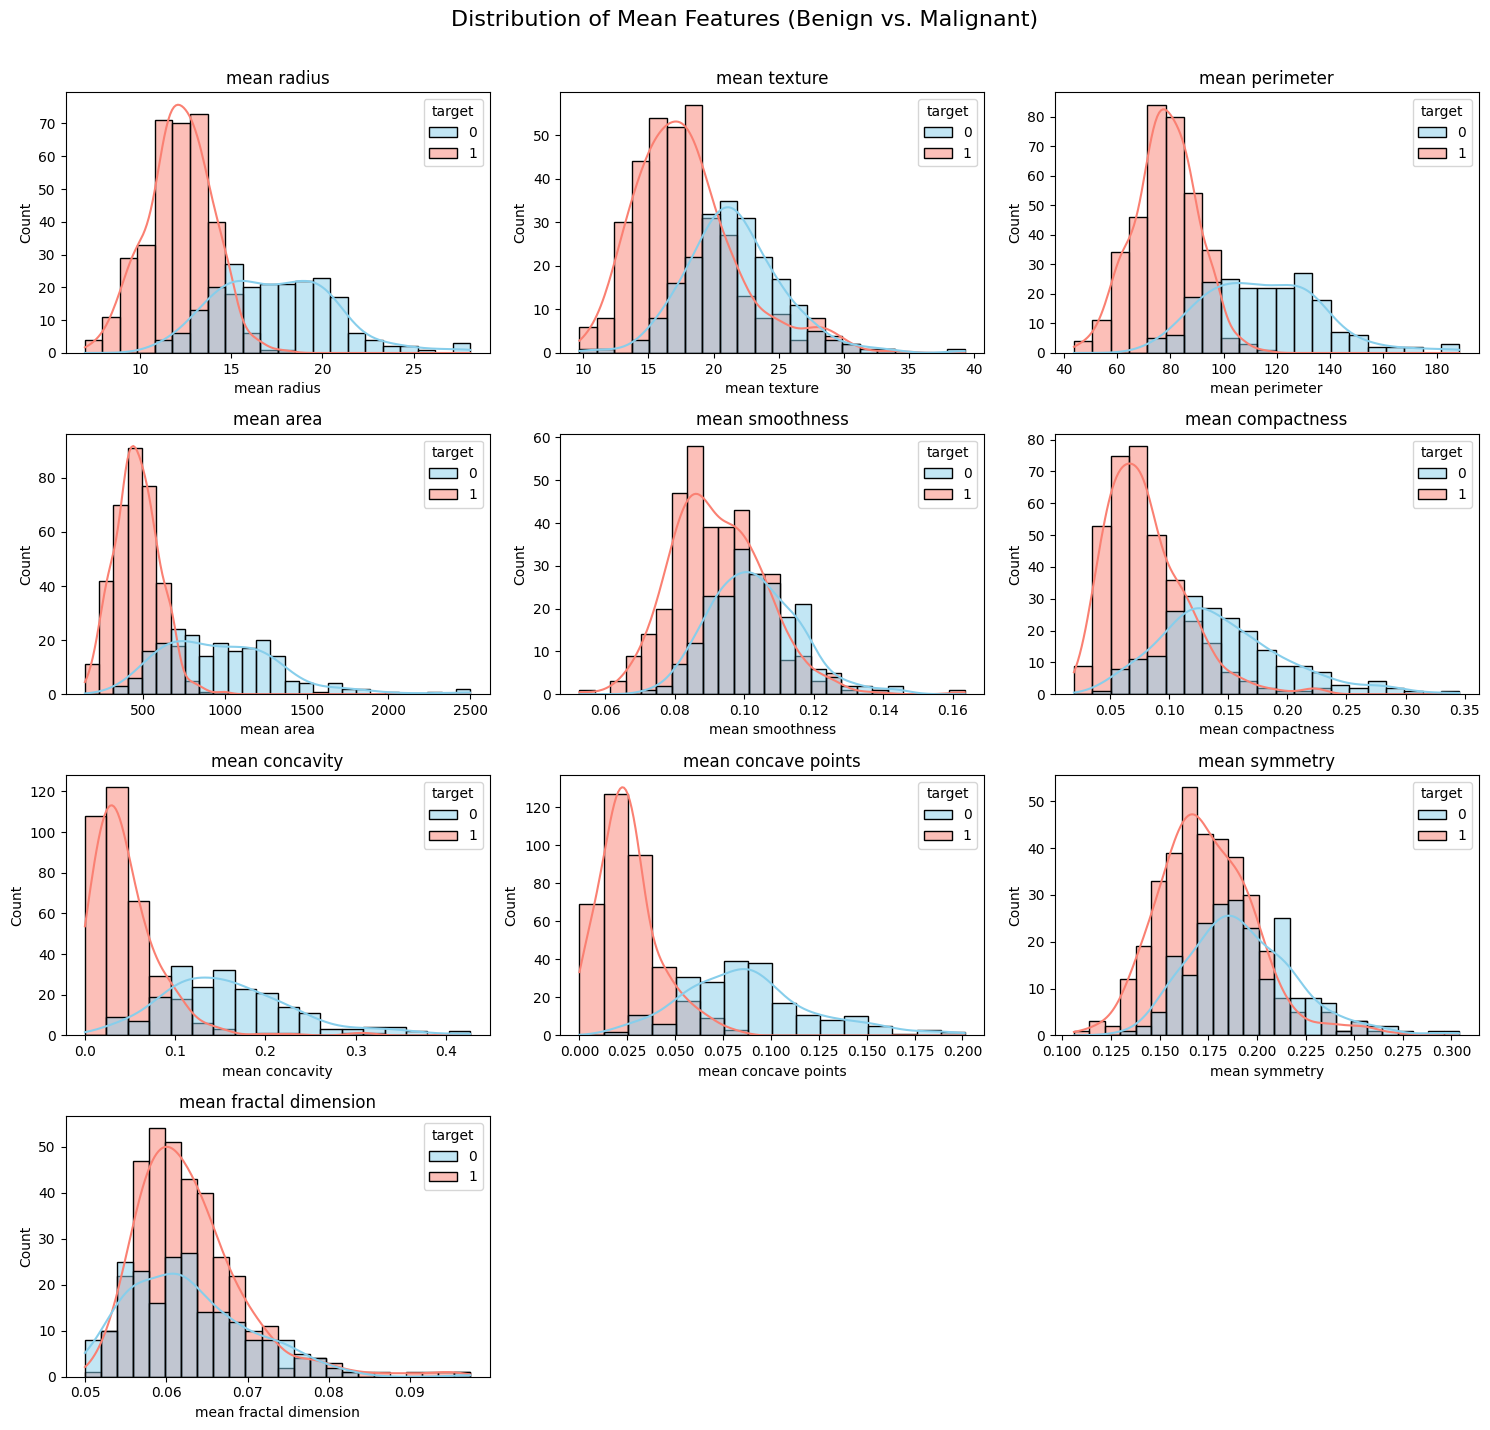

In [371]:
# Plotting the distribution of Benign and Malignant for the mean features
bins = 12
df_mean_target= pd.concat([X[featureMeans], y_df], axis=1)
plt.figure(figsize=(15,15))

for i, feature in enumerate(featureMeans):
    plt.subplot(4,3,i+1)
    sns.histplot(data=df_mean_target, x=feature, hue='target', kde=True, palette={0: "skyblue", 1: "salmon"})
    plt.title(feature)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Distribution of Mean Features (Benign vs. Malignant)', fontsize=16)
plt.show()

### Distribution of Error Features
Figure shown below how datapoints (Benign and Malignant) are distributed in each features. The findings are as follows:
- Radius Error, Perimeter Error, and Area Error have datapoints that are fairly not overlapping with each other

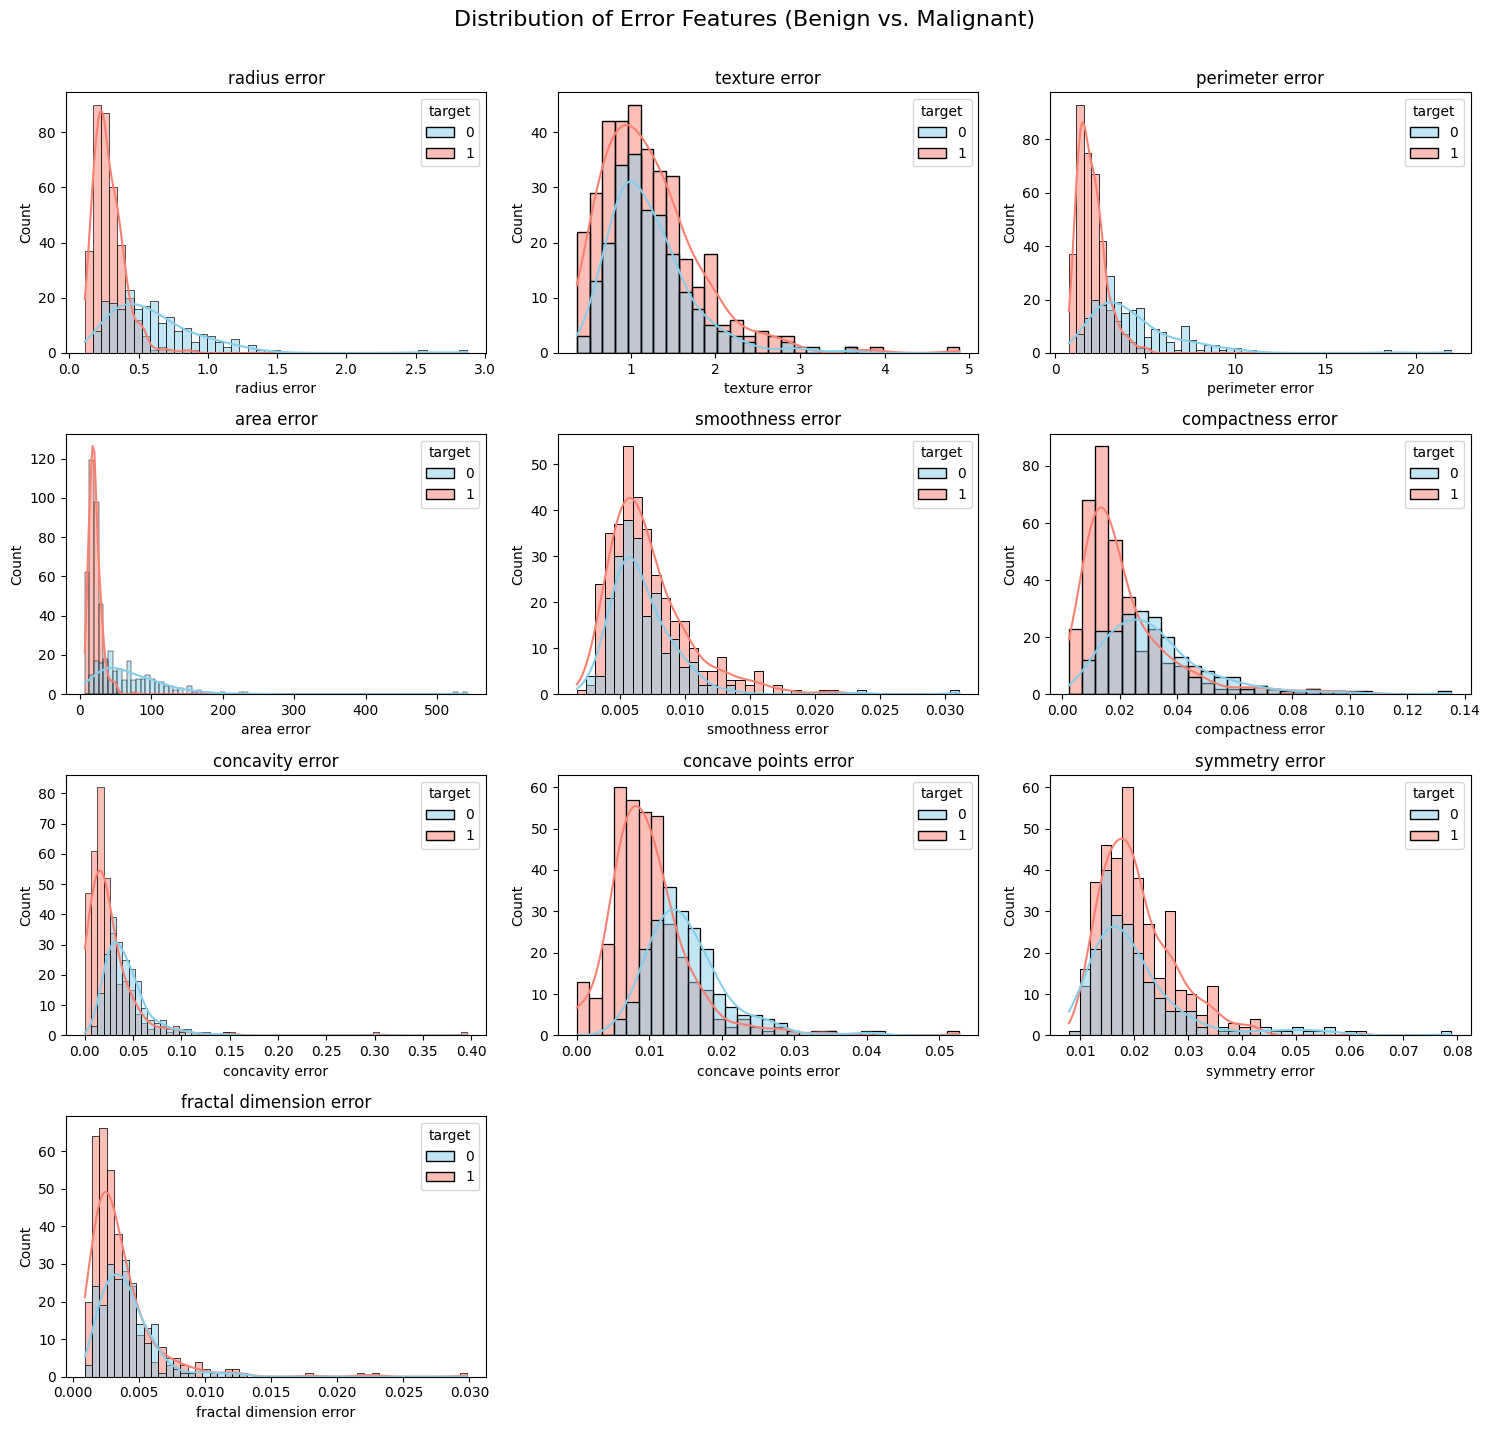

In [372]:
# Plotting the distribution of Benign and Malignant for the error features
bins = 12
df_error_target = pd.concat([X[featureError], y_df], axis=1)
plt.figure(figsize=(15,15))

for i, feature in enumerate(featureError):
    plt.subplot(4,3,i+1)
    sns.histplot(data=df_error_target, x=feature, hue='target', kde=True, palette={0: "skyblue", 1: "salmon"})
    plt.title(feature)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Distribution of Error Features (Benign vs. Malignant)', fontsize=16)
plt.show()

### Distribution of Worst Features
Figure shown below how datapoints (Benign and Malignant) are distributed in each features. The findings are as follows:
- Worst Radius, Worst Perimeter, Worst Area, Worst Compactness, Worst Concavity, and Worst Concave Points have datapoints that are fairly not overlapping with each other

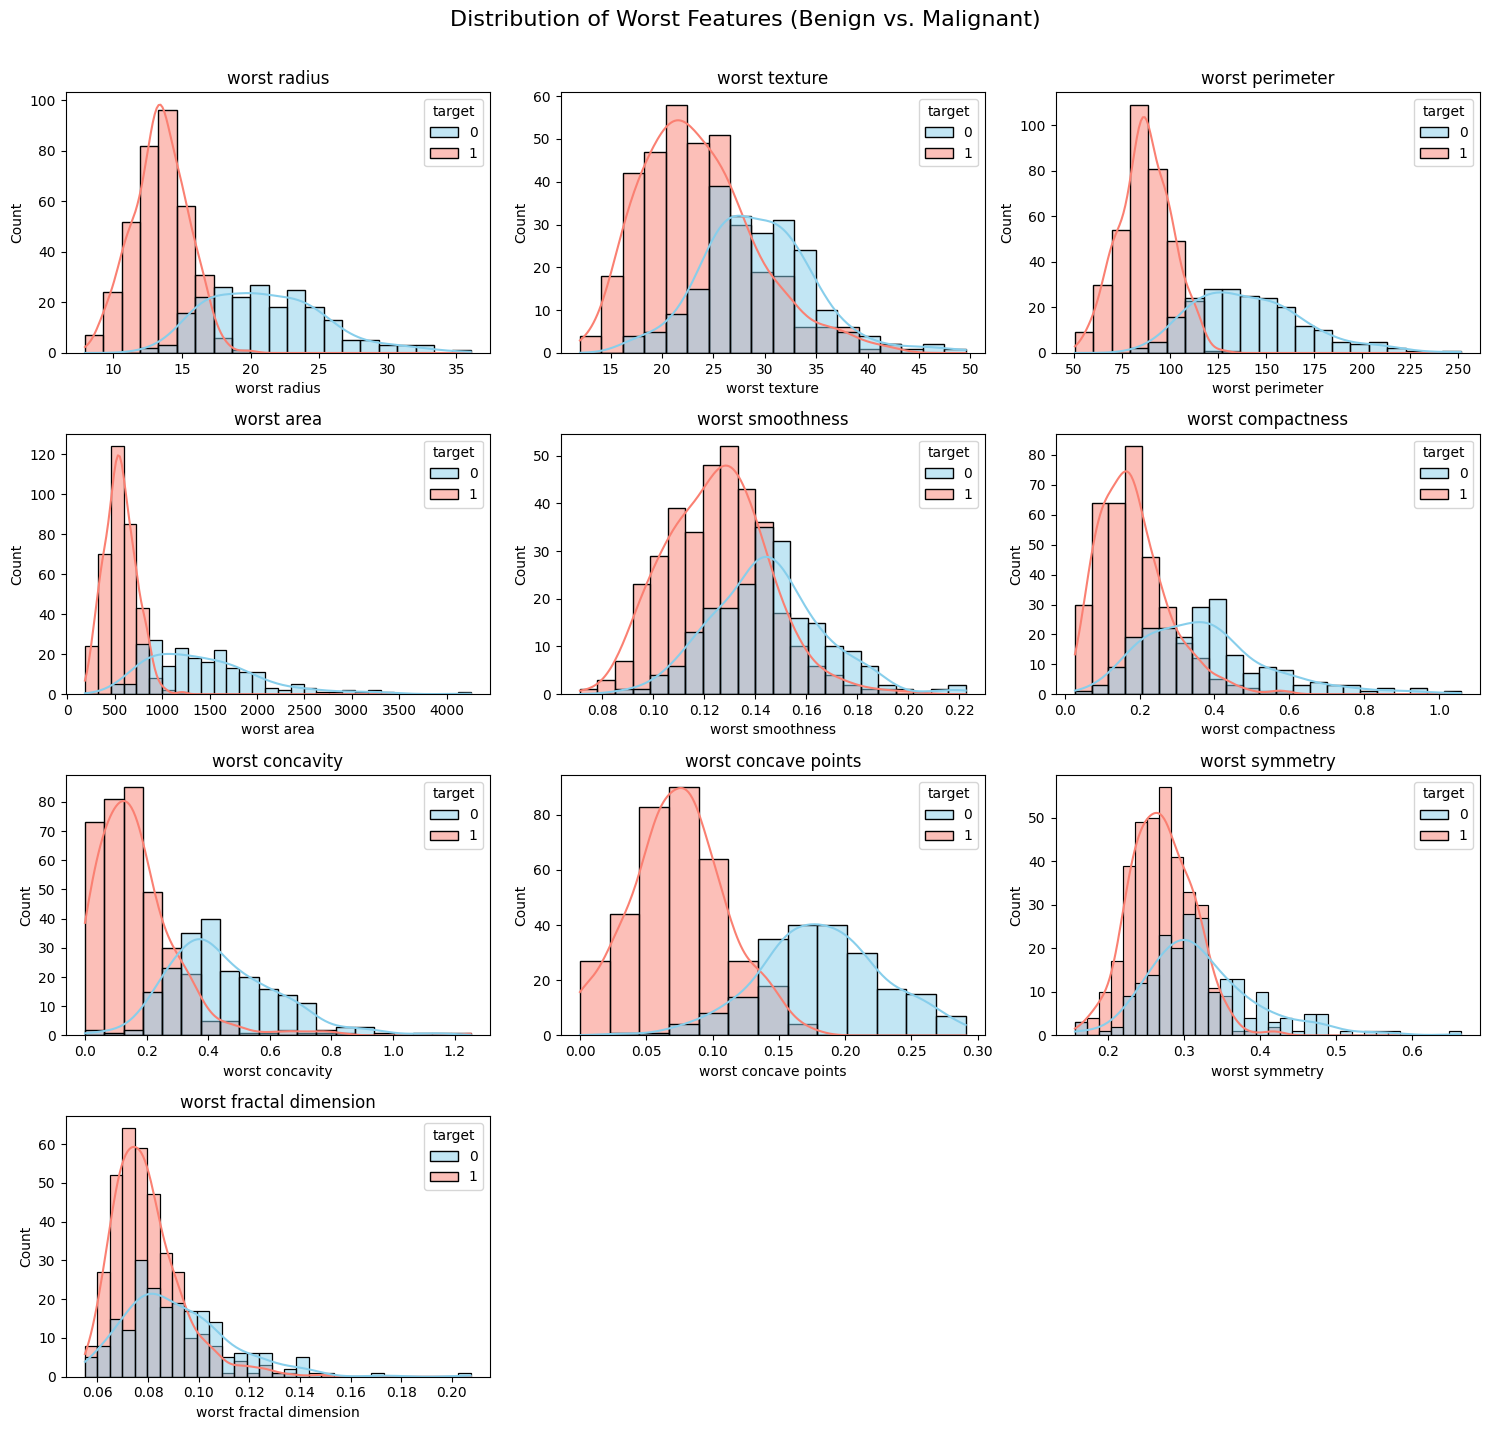

In [373]:
# Plotting the distribution of Benign and Malignant for the worst features
bins = 12
df_worst_target = pd.concat([X[featureWorst], y_df], axis=1)
plt.figure(figsize=(15,15))

for i, feature in enumerate(featureWorst):
    plt.subplot(4,3,i+1)
    sns.histplot(data=df_worst_target, x=feature, hue='target', kde=True, palette={0: "skyblue", 1: "salmon"})
    plt.title(feature)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Distribution of Worst Features (Benign vs. Malignant)', fontsize=16)
plt.show()

### Selecting the relevant features for further analysis
After exploring the information, relationship, and dsitribution of each mean, error, and worst features. The following features are selected for furhter analysis:
- Mean Radius, Mean Texture, Mean Perimeter, Mean Area, Mean Compactness, Mean Concavity, and Mean Concave Points
- Area Error, Perimeter Error, and Radius Error
- Worst Radius, Worst Perimeter, Worst Area, Worst Compactness, Worst Concavity, and Worst Concave Points

### Pair Plot of Selected Mean Features
Figure shown below the distribution of datapoints (Benign and Malignant) of each features and its relationship to other features. The findings are as follows:
- Mean Radius, Mean Perimeter, and Mean Area have strong positive linear relationship to each other
- Other features tend to follow a positive weak linear relationship to each other 

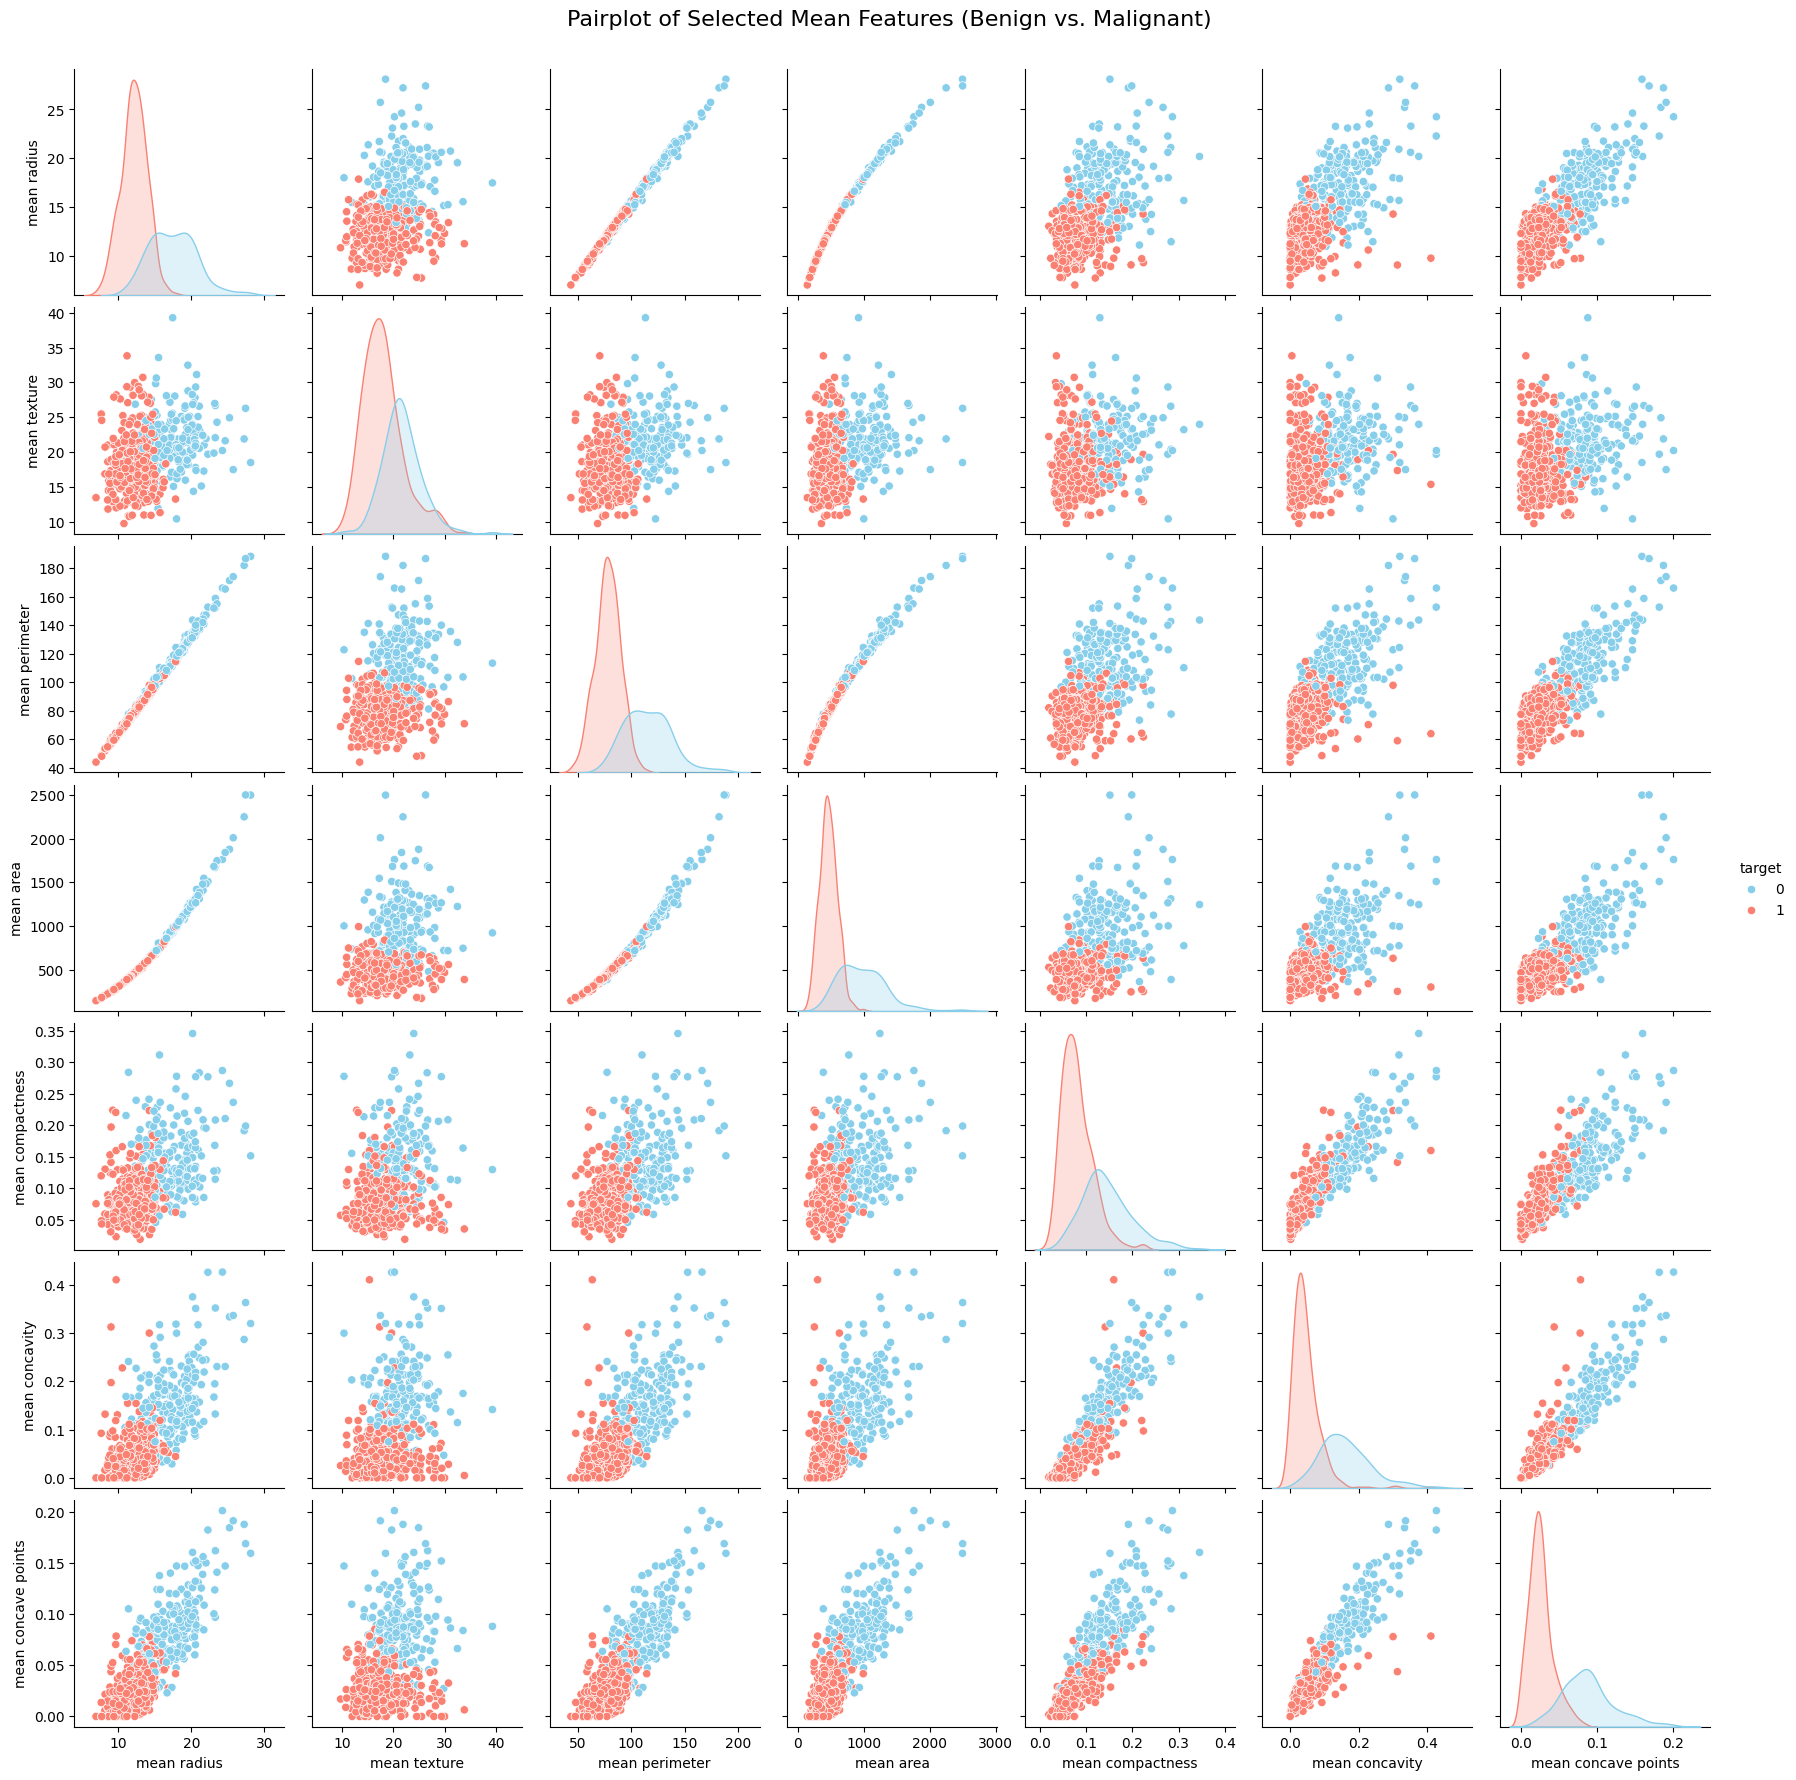

In [374]:
# Plotting the pairwise relationships between Mean Features and the target variable
selected_mean_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points']
sns.pairplot(df_mean_target[selected_mean_features + ['target']], hue='target', palette={0: "skyblue", 1: "salmon"}, diag_kind='kde')
plt.suptitle('Pairplot of Selected Mean Features (Benign vs. Malignant)', y=1.02, fontsize=16)
plt.show()



### Pair Plot of Selected Error Features
Figure shown below the distribution of datapoints (Benign and Malignant) of each features and its relationship to other features. The findings are as follows:
- Radius Error, Perimeter Error, and Area Error have strong positive linear relationship to each other

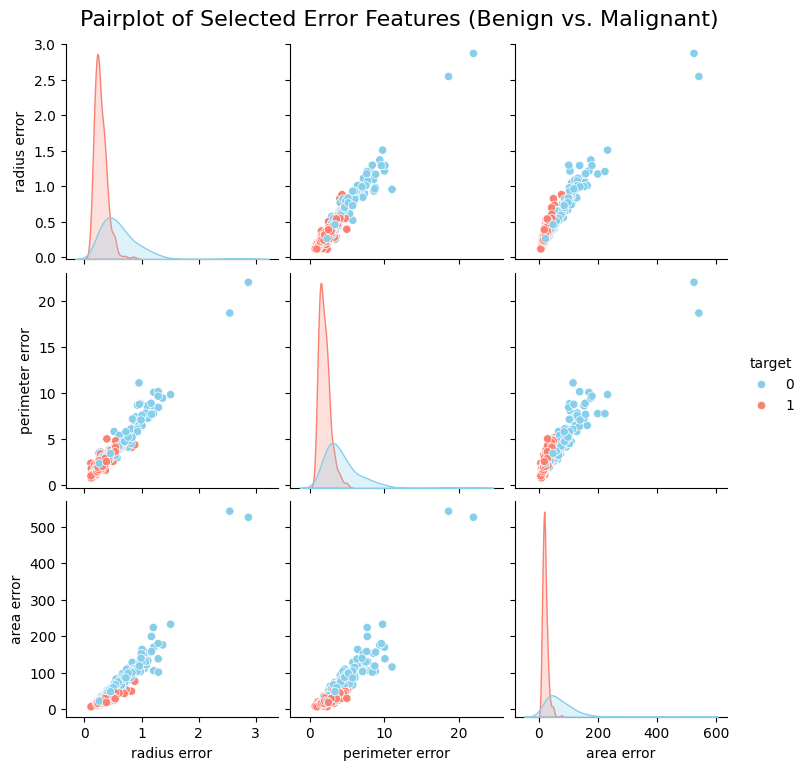

In [375]:
# Plotting the pairwise relationships between Error Features and the target variable
selected_error_features = ['radius error', 'perimeter error', 'area error']
sns.pairplot(df_error_target[selected_error_features + ['target']], hue='target', palette={0: "skyblue", 1: "salmon"}, diag_kind='kde')
plt.suptitle('Pairplot of Selected Error Features (Benign vs. Malignant)', y=1.02, fontsize=16)
plt.show()

### Pair Plot of Selected Worst Features
Figure shown below the distribution of datapoints (Benign and Malignant) of each features and its relationship to other features. The findings are as follows:
- Worst Radius, Worst Perimeter, and Worst Area have strong positive linear relationship to each other
- Other features tend to follow a positive weak linear relationship to each other 

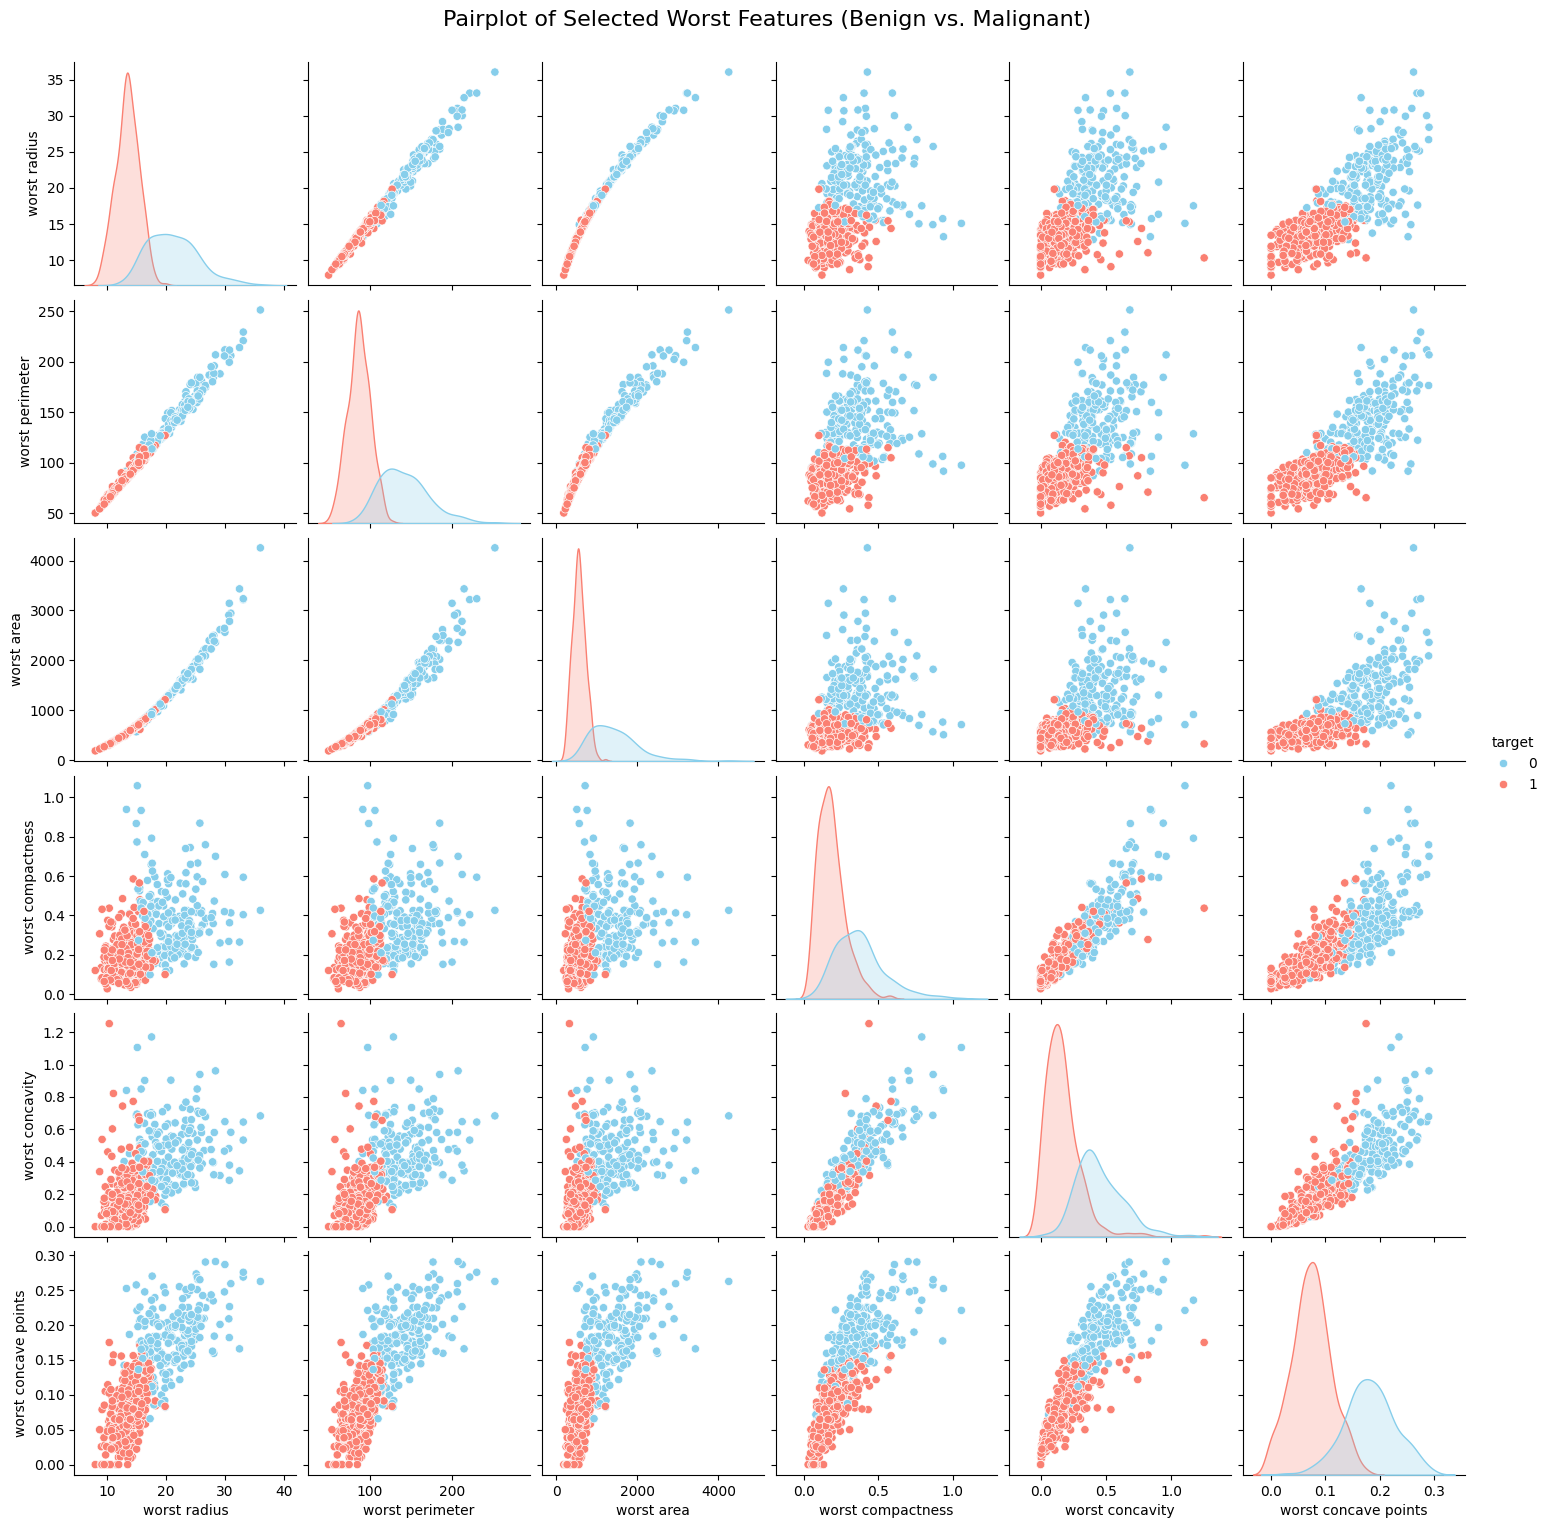

In [376]:
# Plotting the pairwise relationships between Worst Features and the target variable
selected_worst_features = ['worst radius', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points']
sns.pairplot(df_worst_target[selected_worst_features + ['target']], hue='target', palette={0: "skyblue", 1: "salmon"}, diag_kind='kde')
plt.suptitle('Pairplot of Selected Worst Features (Benign vs. Malignant)', y=1.02, fontsize=16)
plt.show()

### Box Plot of Selected Mean Features
Figure shown below the possible outliers of each features. The findings are as follows:
- Possible outliers in Mean Texture and Mean Concavity

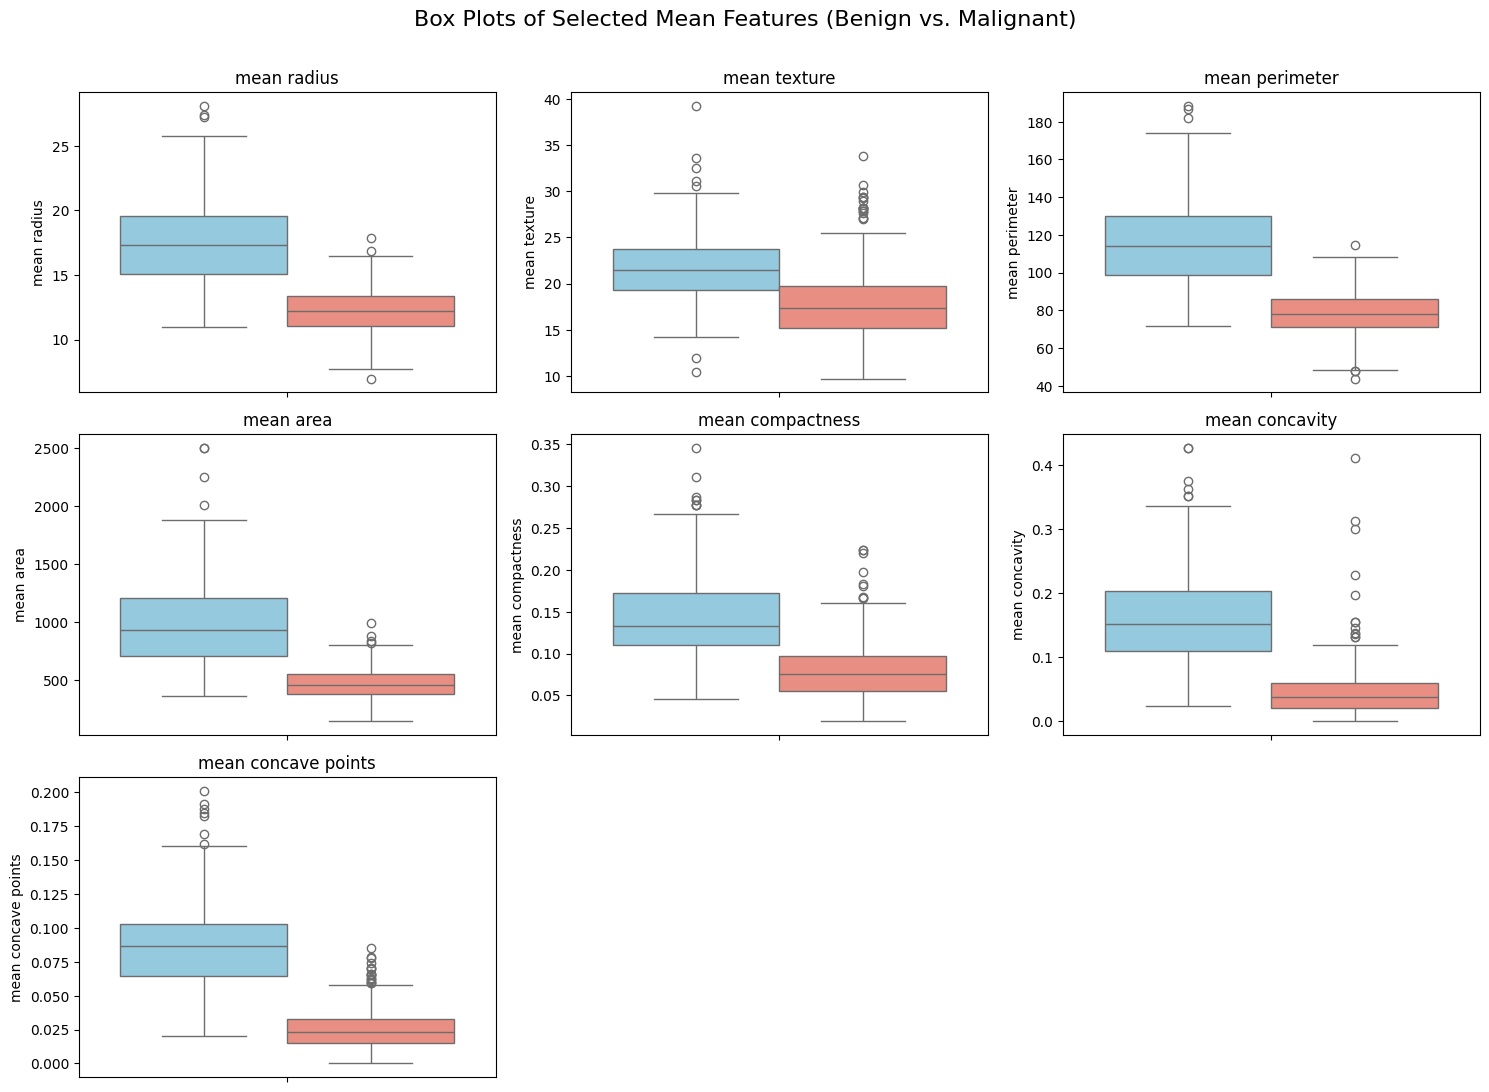

In [377]:
# Using Boxplot to visualize the outliers
df_selected_mean_target= pd.concat([X[selected_mean_features], y_df], axis=1)
plt.figure(figsize=(15,15))

for i, feature in enumerate(selected_mean_features):
    plt.subplot(4,3,i+1)
    sns.boxplot(hue='target', y=feature, legend=False, data=df_selected_mean_target, palette={0: "skyblue", 1: "salmon"})
    plt.title(feature)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Box Plots of Selected Mean Features (Benign vs. Malignant)', fontsize=16)
plt.show()

### Box Plot of Selected Error Features
Figure shown below the possible outliers of each features. The findings are as follows:
- Possible outliers on all selected error features

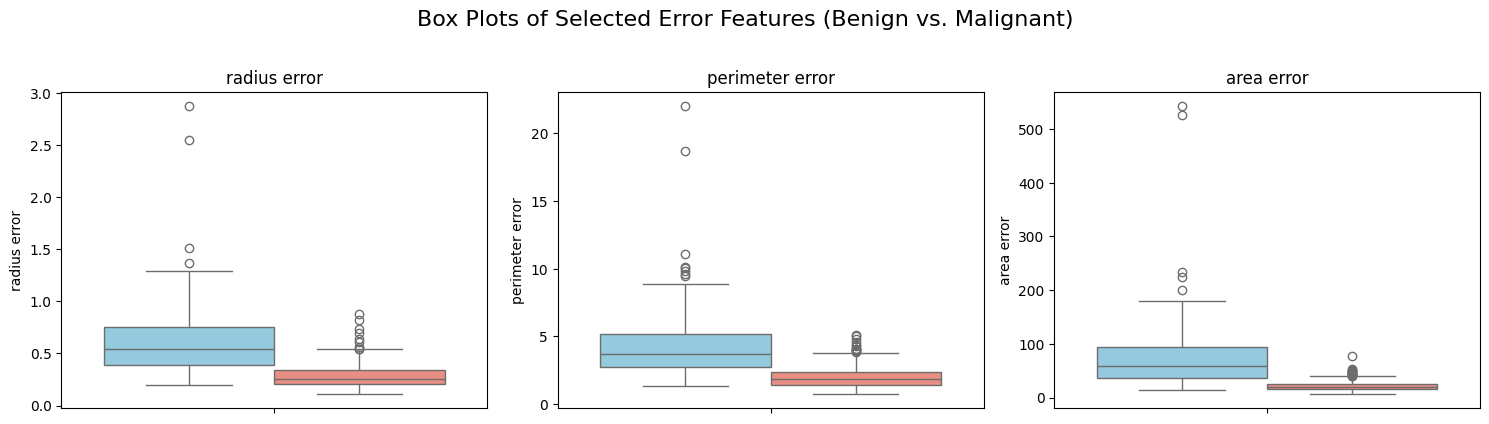

In [378]:
# Using Boxplot to visualize the outliers
df_selected_error_target= pd.concat([X[selected_error_features], y_df], axis=1)
plt.figure(figsize=(15,15))

for i, feature in enumerate(selected_error_features):
    plt.subplot(4,3,i+1)
    sns.boxplot(hue='target', y=feature, legend=False, data=df_selected_error_target, palette={0: "skyblue", 1: "salmon"})
    plt.title(feature)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Box Plots of Selected Error Features (Benign vs. Malignant)', fontsize=16)
plt.show()

### Box Plot of Selected Worst Features
Figure shown below the possible outliers of each features. The findings are as follows:
- Possible outliers in Worst Area and Worst Concavity

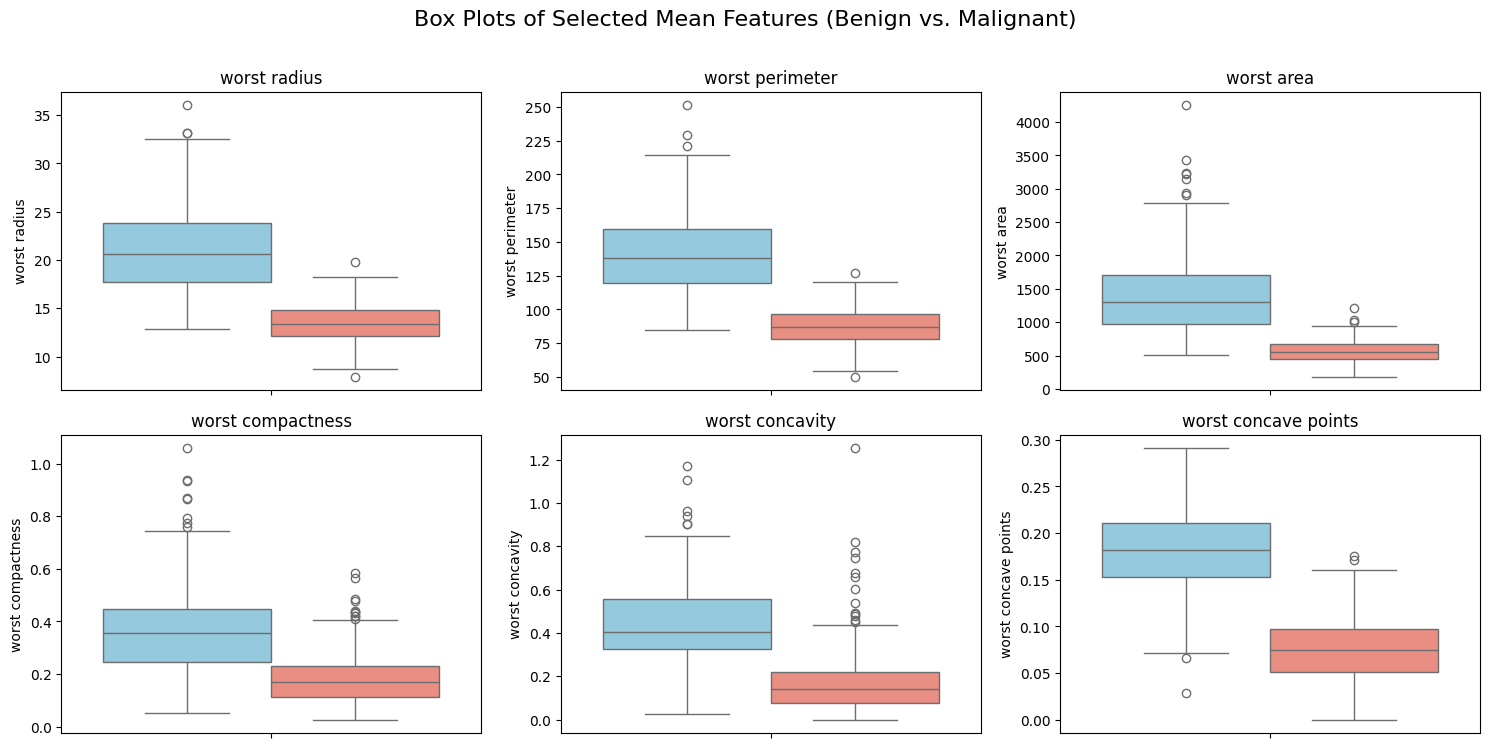

In [379]:
# Using Boxplot to visualize the outliers
df_selected_worst_target= pd.concat([X[selected_worst_features], y_df], axis=1)
plt.figure(figsize=(15,15))

for i, feature in enumerate(selected_worst_features):
    plt.subplot(4,3,i+1)
    sns.boxplot(hue='target', y=feature, legend=False, data=df_selected_worst_target, palette={0: "skyblue", 1: "salmon"})
    plt.title(feature)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Box Plots of Selected Mean Features (Benign vs. Malignant)', fontsize=16)
plt.show()

## Data Preprocessing
After implementing EDA on the dataset, the selected mean, error, and worst features will undergo standardization, PCA, and data splitting in preparation for model implementation.

**NOTE:** Outliers handling will not be implemented to compare the performance of Logistic Regression and Linear Regression with outliers present.

In [380]:
# Select the chosen mean, error, and worst features for the model
X_selected = X[selected_mean_features + selected_error_features + selected_worst_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Perform PCA for 2D visualization (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)


## Model Implementation and Evaluation
Logistic Regression and Linear Regression will be trained using the training set, and then both models will generate predictions using the testing set.

For model evaluation, the following metrics will be used:
- **Accuracy:** The overall proportion of correctly classified cases out of the total number of cases.
- **Precision:** The overall proportion of True Positives out of the total number of True and False Positives.
- **Recall:** The overall proportion of True Positives out of the total number of True and False Negatives.
- **F1 Score:** The harmonic mean of precision and recall.
- **AUC Score:** A measure of the model's ability to distinguish between classes at various thresholds.
- **Confusion Matrix:** A table that summarizes the performance of a classification model by showing the counts of True Positives, True Negatives, False Positives, and False Negatives.

In [381]:
# Train both logistic regression and linear regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_pca, y_train)

linear_model = LinearRegression()
linear_model.fit(X_train_pca, y_train)

# Generate predictions
y_pred_logistic = logistic_model.predict(X_test_pca)
y_prob_logistic = logistic_model.predict_proba(X_test_pca)[:, 1]

y_pred_linear = linear_model.predict(X_test_pca)
y_pred_linear_binary = (y_pred_linear >= 0.5).astype(int)

# Logistic Regression Metrics
logistic_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_logistic),
    "Precision": precision_score(y_test, y_pred_logistic),
    "Recall": recall_score(y_test, y_pred_logistic),
    "F1 Score": f1_score(y_test, y_pred_logistic),
    "AUC Score": roc_auc_score(y_test, y_prob_logistic),
}

# Linear Regression (Thresholded) Metrics
linear_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_linear_binary),
    "Precision": precision_score(y_test, y_pred_linear_binary),
    "Recall": recall_score(y_test, y_pred_linear_binary),
    "F1 Score": f1_score(y_test, y_pred_linear_binary),
    "AUC Score": roc_auc_score(y_test, y_pred_linear),
}

# Display comparison
print("Logistic Regression Metrics:")
for metric, value in logistic_metrics.items():
    print(f"{metric}: {value:.2f}")
print(f"Confusion Matrix:\n%s" % confusion_matrix(y_test, y_pred_logistic))

print("\nLinear Regression (Thresholded) Metrics:")
for metric, value in linear_metrics.items():
    print(f"{metric}: {value:.2f}")
print(f"Confusion Matrix\n%s" % confusion_matrix(y_test, y_pred_linear_binary))


Logistic Regression Metrics:
Accuracy: 0.98
Precision: 0.97
Recall: 1.00
F1 Score: 0.99
AUC Score: 1.00
Confusion Matrix:
[[41  2]
 [ 0 71]]

Linear Regression (Thresholded) Metrics:
Accuracy: 0.95
Precision: 0.92
Recall: 1.00
F1 Score: 0.96
AUC Score: 1.00
Confusion Matrix
[[37  6]
 [ 0 71]]


## Visualization of Results and Comparison
In this section, we will visualize the results of Logistic Regression and Linear Regression predictions and its performance. The findings are as follows:
- **Evaluation Metrics**
    - Logistic Regression have better Accuracy, Precision, and F1 Score compared to Linear Regression
    - Both models have the same Recall and AUC Score
- **Confusion Matrix**
    - Logistic Regression have more True Negatives compared to Linear Regression
    - Linear Regression have more False Positives compared to Logistic Regression
    - Both models do not have False Negatives and have the same number of True Positives
- **Decision Boundary**
    - shows clear distinction between Benign and Malignant prediction
    - does not show clear distinction between Benign and Malignant prediction

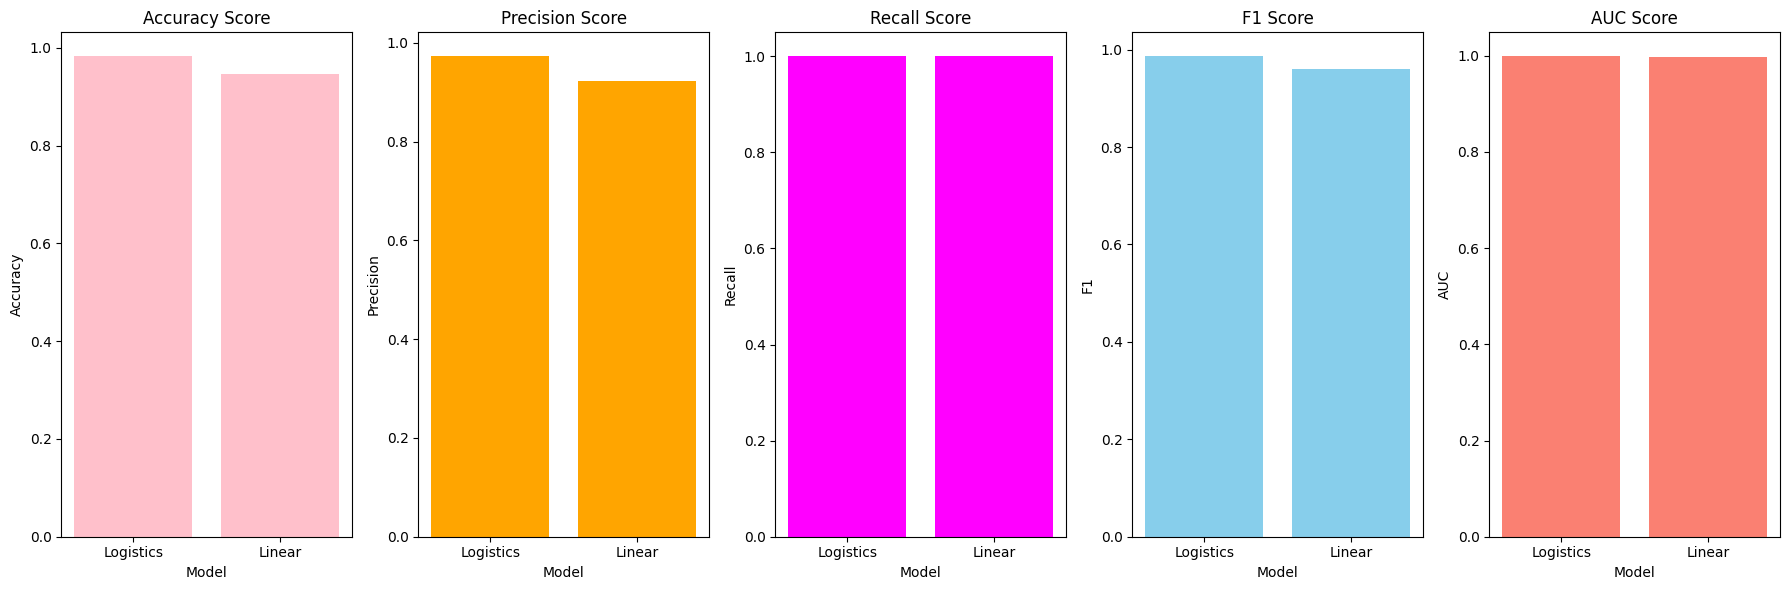

In [382]:
# Prepare the evaluation metrics for visualization
model_label = ['Logistics', 'Linear']
accuracy = [accuracy_score(y_test, y_pred_logistic), accuracy_score(y_test, y_pred_linear_binary)]
precision = [precision_score(y_test, y_pred_logistic), precision_score(y_test, y_pred_linear_binary)]
recall = [recall_score(y_test, y_pred_logistic), recall_score(y_test, y_pred_linear_binary)]
f1 = [f1_score(y_test, y_pred_logistic), f1_score(y_test, y_pred_linear_binary)]
auc = [roc_auc_score(y_test, y_prob_logistic), roc_auc_score(y_test, y_pred_linear)]

# Plotting the evaluation metrics for comparison
fig, axes = plt.subplots(1, 5, figsize=(18, 6))

# Plotting Accuracy Score
axes[0].bar(model_label,accuracy, color='pink')
axes[0].set_title('Accuracy Score')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy')

# Plotting Precision Score
axes[1].bar(model_label, precision, color='orange')
axes[1].set_title('Precision Score')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Precision')

# Plotting Recall Score
axes[2].bar(model_label, recall, color='magenta')
axes[2].set_title('Recall Score')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('Recall')

# Plotting F1 Score
axes[3].bar(model_label, f1, color='skyblue')
axes[3].set_title('F1 Score')
axes[3].set_xlabel('Model')
axes[3].set_ylabel('F1')

# Plotting AUC Score
axes[4].bar(model_label, auc, color='salmon')
axes[4].set_title('AUC Score')
axes[4].set_xlabel('Model')
axes[4].set_ylabel('AUC')

plt.tight_layout()
plt.show()

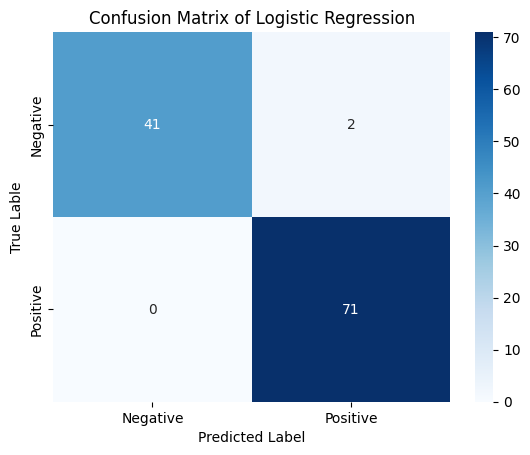

In [383]:
# Visualize the confusion matrix of logistic regression using heatmap
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Lable')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

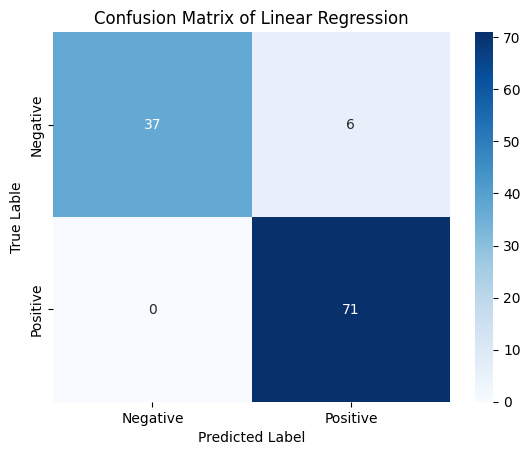

In [384]:
# Visualize the confusion matrix of linear regression using heatmap
cm_linear = confusion_matrix(y_test, y_pred_linear_binary)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Lable')
plt.title('Confusion Matrix of Linear Regression')
plt.show()

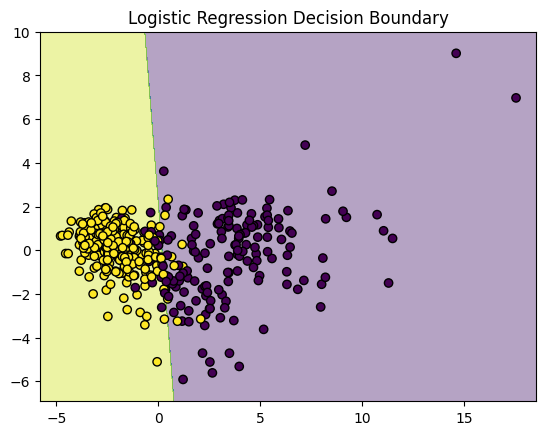

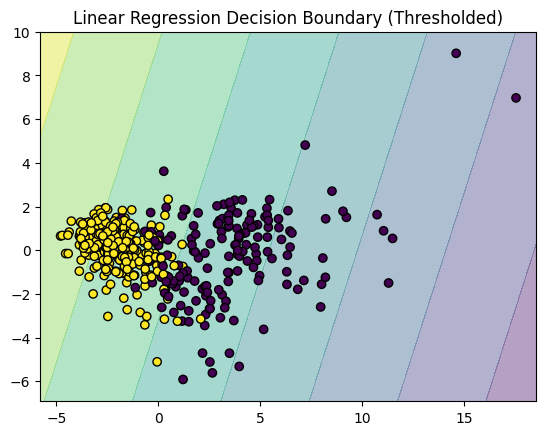

In [385]:
# Decision boundary plotting function
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(logistic_model, X_train_pca, y_train, "Logistic Regression Decision Boundary")
plot_decision_boundary(linear_model, X_train_pca, y_train, "Linear Regression Decision Boundary (Thresholded)")


## Hyperparameter Tuning
In this section, GirdSearchCV will be used to find the best penalty, C value, solver, and l1 ratio for Logistic Regression.

In [386]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Try different C values
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], # Different solvers
    'l1_ratio': [0,1, 0.3, 0.5, 0.7, 0.9]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', error_score=0)
grid_search.fit(X_train_pca, y_train)

best_model = grid_search.best_estimator_  # Get the best model
best_params = grid_search.best_params_  # Get the best parameters
best_score = grid_search.best_score_  # Get the best score

print("Best Parameters:", best_params)
print("Best Score:", best_score)

/Users/jjelleazarr/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/jjelleazarr/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/jjelleazarr/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/jjelleazarr/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/jjelleazarr/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when

Best Parameters: {'C': 0.01, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9406593406593406


/Users/jjelleazarr/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/jjelleazarr/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/jjelleazarr/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/jjelleazarr/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/jjelleazarr/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when

In [387]:
# Select the chosen mean, error, and worst features for the model
X_selected = X[selected_mean_features + selected_error_features + selected_worst_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Perform PCA for 2D visualization (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)

# Train logistic regression with the best parameters
logistic_model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
logistic_model.fit(X_train_pca, y_train)

# Generate predictions
y_pred_logistic = logistic_model.predict(X_test_pca)
y_prob_logistic = logistic_model.predict_proba(X_test_pca)[:, 1]

# Logistic Regression Metrics
logistic_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_logistic),
    "Precision": precision_score(y_test, y_pred_logistic),
    "Recall": recall_score(y_test, y_pred_logistic),
    "F1 Score": f1_score(y_test, y_pred_logistic),
    "AUC Score": roc_auc_score(y_test, y_prob_logistic),
}

# Linear Regression (Thresholded) Metrics
linear_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_linear_binary),
    "Precision": precision_score(y_test, y_pred_linear_binary),
    "Recall": recall_score(y_test, y_pred_linear_binary),
    "F1 Score": f1_score(y_test, y_pred_linear_binary),
    "AUC Score": roc_auc_score(y_test, y_pred_linear),
}

# Display comparison
print("Logistic Regression Metrics:")
for metric, value in logistic_metrics.items():
    print(f"{metric}: {value:.2f}")
print(f"Confusion Matrix:\n%s" % confusion_matrix(y_test, y_pred_logistic))

print("\nLinear Regression (Thresholded) Metrics:")
for metric, value in linear_metrics.items():
    print(f"{metric}: {value:.2f}")
print(f"Confusion Matrix\n%s" % confusion_matrix(y_test, y_pred_linear_binary))

Logistic Regression Metrics:
Accuracy: 0.97
Precision: 0.99
Recall: 0.97
F1 Score: 0.98
AUC Score: 1.00
Confusion Matrix:
[[42  1]
 [ 2 69]]

Linear Regression (Thresholded) Metrics:
Accuracy: 0.95
Precision: 0.92
Recall: 1.00
F1 Score: 0.96
AUC Score: 1.00
Confusion Matrix
[[37  6]
 [ 0 71]]


## Visualization of Tuned Logstici Regression Results and Comparison
In this section, we will visualize the results of Tuned Logistic Regression and Linear Regression predictions and its performance. The findings are as follows:
- **Evaluation Metrics**
    - Tuned Logistic Regression have better Accuracy, Precision, and F1 Score compared to Linear Regression
    - Both models have the same AUC Score
    - Linear Regression have better Recall Score compared to Tuned Logistic Regression
- **Confusion Matrix**
    - Tuned Logistic Regression have more True Negatives and False Negatives but less True Positives and False Positives compared to Linear Regression
- **Decision Boundary**
    - The decision boundary of Tuned Logistic Regression is more straight than the regular Logistic Regression

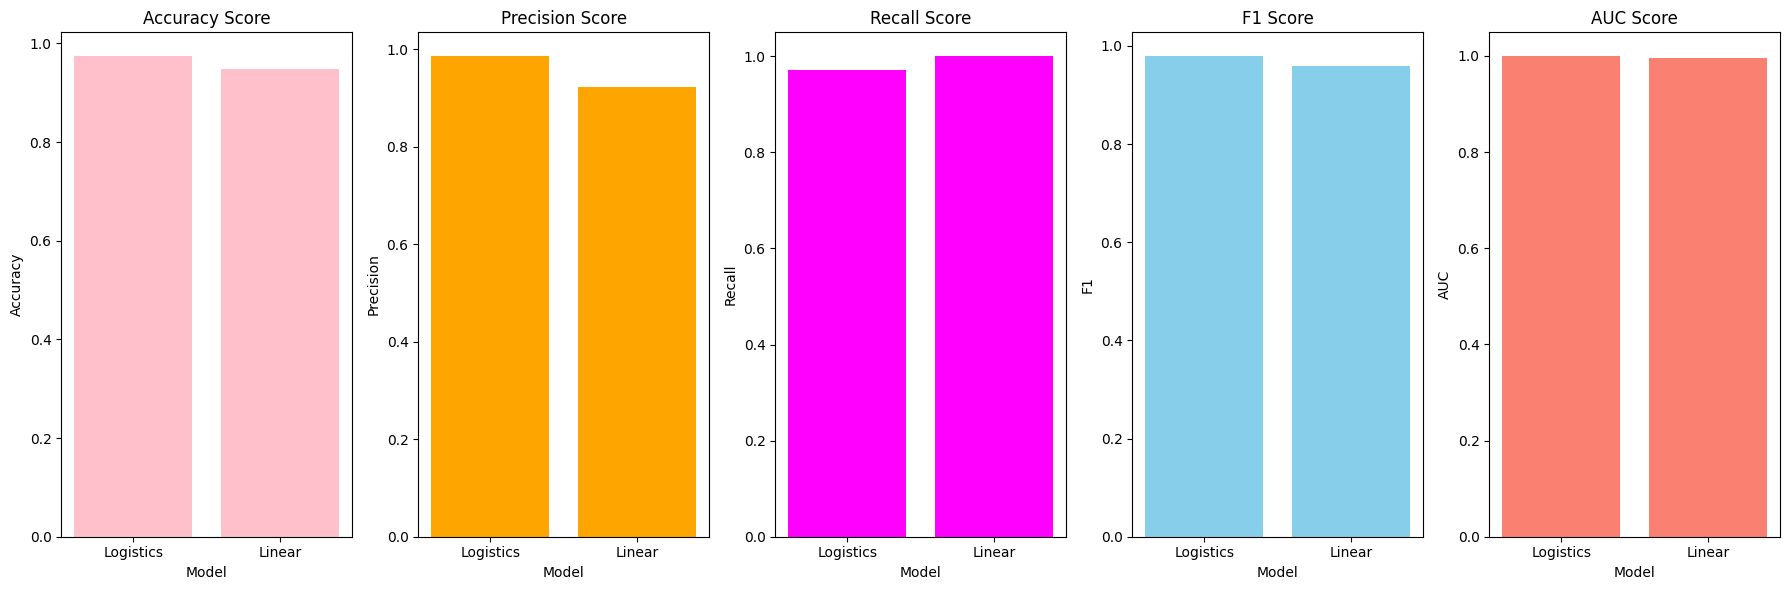

In [388]:
# Prepare the evaluation metrics for visualization
model_label = ['Logistics', 'Linear']
accuracy = [accuracy_score(y_test, y_pred_logistic), accuracy_score(y_test, y_pred_linear_binary)]
precision = [precision_score(y_test, y_pred_logistic), precision_score(y_test, y_pred_linear_binary)]
recall = [recall_score(y_test, y_pred_logistic), recall_score(y_test, y_pred_linear_binary)]
f1 = [f1_score(y_test, y_pred_logistic), f1_score(y_test, y_pred_linear_binary)]
auc = [roc_auc_score(y_test, y_prob_logistic), roc_auc_score(y_test, y_pred_linear)]

# Plotting the evaluation metrics for comparison
fig, axes = plt.subplots(1, 5, figsize=(18, 6))

# Plotting Accuracy Score
axes[0].bar(model_label,accuracy, color='pink')
axes[0].set_title('Accuracy Score')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy')

# Plotting Precision Score
axes[1].bar(model_label, precision, color='orange')
axes[1].set_title('Precision Score')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Precision')

# Plotting Recall Score
axes[2].bar(model_label, recall, color='magenta')
axes[2].set_title('Recall Score')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('Recall')

# Plotting F1 Score
axes[3].bar(model_label, f1, color='skyblue')
axes[3].set_title('F1 Score')
axes[3].set_xlabel('Model')
axes[3].set_ylabel('F1')

# Plotting AUC Score
axes[4].bar(model_label, auc, color='salmon')
axes[4].set_title('AUC Score')
axes[4].set_xlabel('Model')
axes[4].set_ylabel('AUC')

plt.tight_layout()
plt.show()

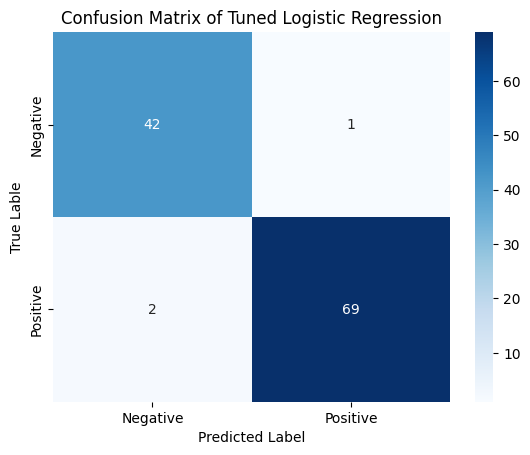

In [389]:
# Visualize the confusion matrix of tuned logistic regression using heatmap
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Lable')
plt.title('Confusion Matrix of Tuned Logistic Regression')
plt.show()

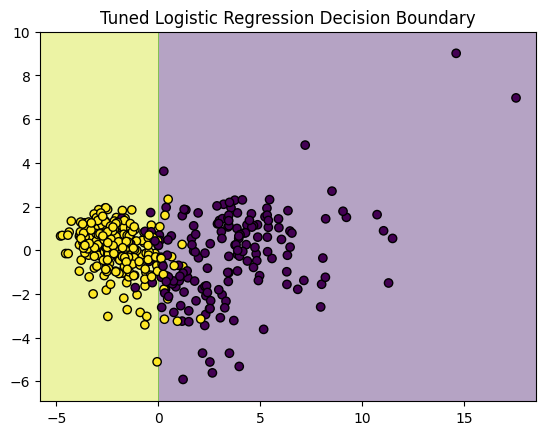

In [390]:
# Decision boundary plotting function
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(logistic_model, X_train_pca, y_train, "Tuned Logistic Regression Decision Boundary")

### Feature Importance
This section will show the impact of each feature to Logistic Regression using coefficient visualization. The findings are as follows:
- 9 features have positive impact to Logistic Regression while 21 features have negative impact to Logistic Regression
- Compactness Error, Fractual Dimension Error, and Mean Compactness have the most positive impact to Logistic Regression
- Worst Texture and Radius Error have the most negative impact to Logistic Regression

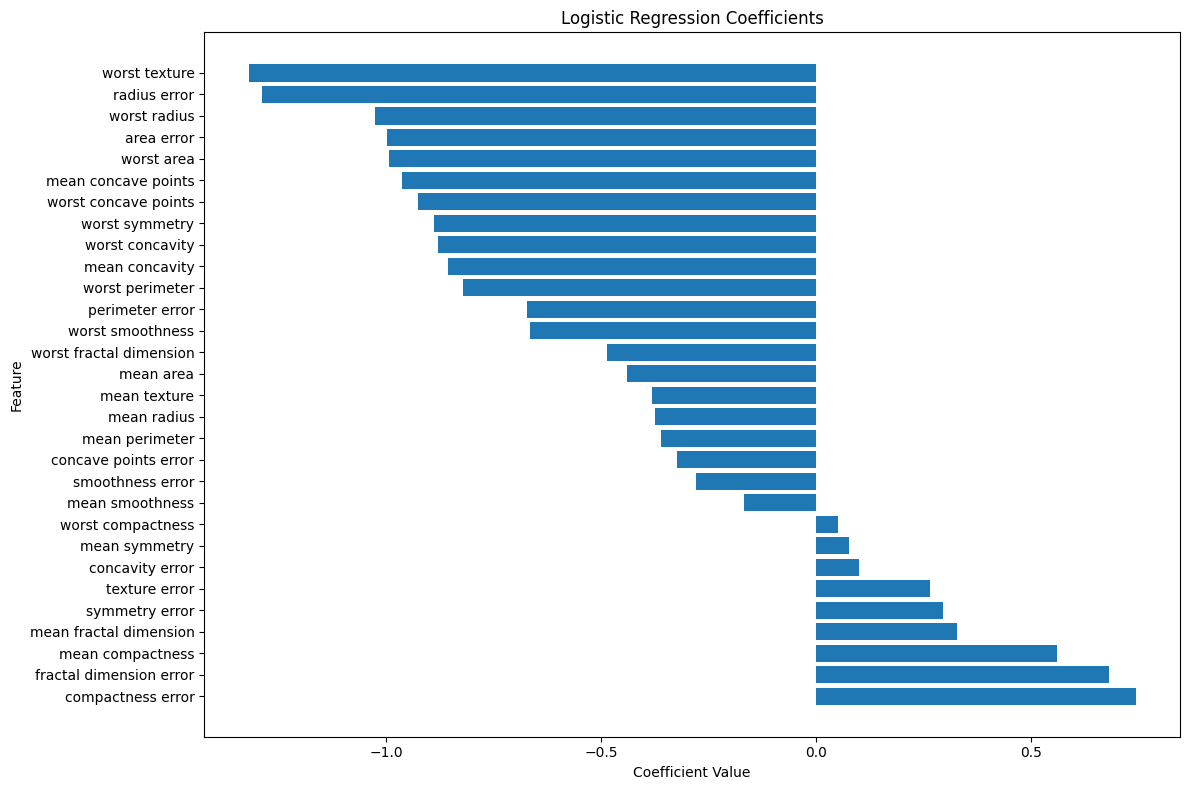

                    Feature  Coefficient
15        compactness error     0.744077
19  fractal dimension error     0.681746
5          mean compactness     0.560707
9    mean fractal dimension     0.328458
18           symmetry error     0.295044
11            texture error     0.265116
16          concavity error     0.101207
8             mean symmetry     0.076312
25        worst compactness     0.051142
4           mean smoothness    -0.167376
14         smoothness error    -0.279509
17     concave points error    -0.323145
2            mean perimeter    -0.360971
0               mean radius    -0.375457
1              mean texture    -0.382031
3                 mean area    -0.439469
29  worst fractal dimension    -0.486990
24         worst smoothness    -0.665715
12          perimeter error    -0.671895
22          worst perimeter    -0.820397
6            mean concavity    -0.855295
26          worst concavity    -0.880223
28           worst symmetry    -0.888711
27     worst con

In [391]:
# Redo the whole process for Feature Importance
# Load and preprocess data
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Scale the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_scaled, y)

# Get the coefficients
coefficients = model.coef_[0]

# Create a DataFrame for visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Visualize the coefficients using bar plot
plt.figure(figsize=(12, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.tight_layout()
plt.show()

# 7. Print coefficients for inspection
print(coef_df)

## Conclusion and Discussion
Refer to "ELLEAZAR - Formative Lab Exercise #1" document for this part.

### Summary
- **Logistic Regression:** Provides a well-defined decision boundary and robust performance metrics, even with a more complex dataset. Logistic regression effectively handles binary classification, regardless of feature relevance.
- **Linear Regression:** Struggles with classification tasks on complex datasets, as demonstrated by its weaker decision boundary and poorer performance metrics.

### For Submission Before Dismissal
1. **Model Behavior:**
   - How do the decision boundaries differ between logistic regression and linear regression when applied to high-dimensional data?
   - Why does logistic regression handle class imbalance better than linear regression?

2. **Feature Importance:**
   - How can feature importance be determined for logistic regression? Which features contribute most to the classification decision?
   - How does the presence of irrelevant or highly correlated features impact both models?

3. **Scalability:**
   - How would these models perform on a significantly larger dataset with millions of samples? Consider time complexity and scalability.
   - What strategies could be employed to optimize logistic regression for large-scale data?

4. **Robustness:**
   - What happens if the dataset contains significant noise or outliers? How do these models respond?
   - How would logistic and linear regression handle missing data or incomplete features?

5. **Interpretability:**
   - How does the interpretability of logistic regression compare to that of linear regression?
   - What are the trade-offs between model interpretability and predictive power when dealing with complex datasets?

6. **Metrics:**
   - **Accuracy:**
     - How does the accuracy of logistic regression compare to linear regression on this dataset, and what does this reveal about each model's overall performance?
   - **Precision and Recall:**
     - Compare the precision and recall scores for logistic regression and linear regression. What do these metrics indicate about each model's ability to correctly identify positive cases and avoid false positives?
   - **F1 Score:**
     - How do the F1 scores of the two models compare, and what does the F1 score tell us about the balance between precision and recall for each model?
   - **AUC Score:**
     - How does the AUC score of logistic regression compare to that of linear regression, and what does the AUC score reveal about each model's ability to discriminate between classes?
   - **Confusion Matrix:**
     - What insights can be drawn from the confusion matrix for both models, and how does it help identify the models' strengths and weaknesses in terms of true positives, false positives, true negatives, and false negatives?
